<a href="https://colab.research.google.com/github/panaku88/MCS-7103-Machine-Learning/blob/main/EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on last week's lecture, your assignment is to perform Exploratory Data Analysis Process (DAP) on your dataset and write a report that is at least 3 pages long. You can write as many pages as you need. The report needs to be clear and follow a step-by-step process.
1.	Present your question before and after, then the answers. The answers can be before the next step (Data Wrangling), every process or after the full process. The question that helped you select the dataset should differ from the questions you are using for the rest of the process. I have general questions to guide you through your analysis.
2.	Perform in-depth data wrangling.
3.	Provide a well-detailed Exploratory Data Analysis (EDA).
4.	Draw some conclusions based on the performed EDA.
5.	Communicate the ﬁndings in a detailed report.


1. Here I am importing the Google Drive Python Library which is used to connect to colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Importing the necessary Python Libraries discussed in the report write up

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import random

3. Reading the raw customer dataset into a Pandas Dataframe and specifying a custom directory (output_path) to store modified dataset

In [ ]:
raw_dataset = pd.read_csv('/content/drive/MyDrive/MCSC1/dataset/CS_Service_Data.csv')

# Specify the path to save the modified/manipulated dataset
output_path = '/content/drive/MyDrive/MCSC1/dataset/customer_support_dataset.csv'


4. Here next code cells, I am assessing the Dataset in order to understand the structure, content and check if there are problems in the dataset

In [ ]:
raw_dataset.head()

In [ ]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252608 entries, 0 to 252607
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TICKET NUMBER           252608 non-null  object 
 1   CUSTOMER ACCOUNT        252608 non-null  object 
 2   CUSTOMER NAME           252608 non-null  object 
 3   SERVICE PLAN            252608 non-null  object 
 4   SOURCE                  252607 non-null  object 
 5   Logged By User          252608 non-null  object 
 6   DATE LOGGED             252608 non-null  float64
 7   CATEGORY                252385 non-null  object 
 8   SUB-CATEGORY            251920 non-null  object 
 9   PRIORITY                252608 non-null  object 
 10  LOGGED DESCRIPTION      252607 non-null  object 
 11  CURRENT STATUS          252608 non-null  object 
 12  TICKET CENTER           252608 non-null  object 
 13  TICKET OWNER            251165 non-null  object 
 14  TIME IDLE (MINS)    

In [ ]:
raw_dataset.describe()

,DATE LOGGED,TIME IDLE (MINS),TIME TO CLOSE (MINS),ALLOCATED TIME (MINS),ALLOCATED TIME (HOURS)
count,252608.000000,2.526080e+05,2.526080e+05,252608.000000,252608.000000
mean,44910.240841,4.411202e+03,1.449370e+04,449.459055,7.414437
std,201.256081,6.567665e+04,8.406514e+04,5122.619434,85.342740
min,44562.046530,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,44744.650518,0.000000e+00,3.000000e+01,0.000000,0.000000
50%,44896.445830,0.000000e+00,2.630000e+02,0.000000,0.000000
75%,45076.567360,0.000000e+00,1.970000e+03,0.000000,0.000000
max,45290.959720,1.409451e+06,1.409454e+06,335112.000000,5585.000000


In [ ]:
raw_dataset.isnull().sum()

TICKET NUMBER                0
CUSTOMER ACCOUNT             0
CUSTOMER NAME                0
SERVICE PLAN                 0
SOURCE                       1
Logged By User               0
DATE LOGGED                  0
CATEGORY                   223
SUB-CATEGORY               688
PRIORITY                     0
LOGGED DESCRIPTION           1
CURRENT STATUS               0
TICKET CENTER                0
TICKET OWNER              1443
TIME IDLE (MINS)             0
TIME IDLE (DAYS)             0
TIME TO CLOSE (MINS)         0
TIME TO CLOSE (DAYS)         0
ALLOCATED TIME (MINS)        0
ALLOCATED TIME (HOURS)       0
dtype: int64

In [ ]:
raw_dataset.shape

(252608, 20)

In [ ]:
raw_dataset.columns

Index(['TICKET NUMBER', 'CUSTOMER ACCOUNT', 'CUSTOMER NAME', 'SERVICE PLAN',
       'SOURCE', 'Logged By User', 'DATE LOGGED', 'CATEGORY', 'SUB-CATEGORY',
       'PRIORITY', 'LOGGED DESCRIPTION', 'CURRENT STATUS', 'TICKET CENTER',
       'TICKET OWNER', 'TIME IDLE (MINS)', 'TIME IDLE (DAYS)',
       'TIME TO CLOSE (MINS)', 'TIME TO CLOSE (DAYS)', 'ALLOCATED TIME (MINS)',
       'ALLOCATED TIME (HOURS)'],
      dtype='object')

5. The following are custom Python code to manipulate the dataset. Precisely, we are removing any sensitive information from the data

In [ ]:
customer_names = {}
syllables = ['a', 'e', 'i', 'o', 'u', 'ka', 'ko', 'sa', 'tu', 'ma', 'me', 'mi', 'mo', 'mu', 'ya', 'ye', 'yi', 'yo', 'yu', 'ra', 're', 'ri', 'ro', 'ru', 'wa', 'we', 'wi', 'wo', 'wu']

def generate_name(min_length=3, max_length=6):
  name = ''
  length = random.randint(min_length, max_length)
  for i in range(length):
    name += random.choice(syllables)
  return name.capitalize()

def generate_customer_name(row):
  name = row['CUSTOMER NAME']
  account = row['CUSTOMER ACCOUNT']
  if isinstance(name, str):
    if account in customer_names:
      return customer_names[account]
    else:
      if 'Mr' in name or 'Ms' in name:
        title = random.choice(['Mr', 'Ms'])
        first_name = generate_name()
        last_name = generate_name()
        new_name = f'{title} {first_name} {last_name}'
      elif 'Company' in name or 'Ltd' in name or 'Inc' in name:
        new_name = generate_name() + ' Inc'
      else:
        first_name = generate_name()
        last_name = generate_name()
        new_name = f'{first_name} {last_name}'
      customer_names[account] = new_name
      return new_name
  else:
    return name

raw_dataset['CUSTOMER NAME'] = raw_dataset.apply(generate_customer_name, axis=1)


# Define a function to replace senstive incident ID
def replace_rke_with_tt(text):
    # Check if the value is a string
    if isinstance(text, str):
        # Replace any word starting with 'RKE' with 'TT' but keep the rest of the word unchanged
        return re.sub(r'\bRKE(\w*)\b', r'TT\1', text)
    else:
        # Return the original value if it's not a string
        return text


def replace_service_plan(text):
  if isinstance(text, str):
    if re.match(r'CAPPED-BASE: Roke Capped Base', text):
      return 'SONIC HOME PRO 25Mbps'
    else:
      return text
  else:
    return text

def replace_service_plan_ent(text):
  if isinstance(text, str):
    match = re.search(r'RE(\d+): Roke Enterprise', text)
    if match:
      number = match.group(1)
      return f'SONIC BUSINESS {number}Mbps'
    else:
      return text
  else:
    return text


def replace_service_plan_vpn(text):
  if isinstance(text, str):
    if 'VPN' in text or 'vpn' in text:
      random_number = random.randint(1, 100)
      return f'SONIC MPLS VPN {random_number}Mbps'
    else:
      return text
  else:
    return text

# here i am calling the above functions to manipulate the dataset
raw_dataset['SERVICE PLAN'] = raw_dataset['SERVICE PLAN'].apply(replace_service_plan_vpn)
raw_dataset['SERVICE PLAN'] = raw_dataset['SERVICE PLAN'].apply(replace_service_plan_ent)
raw_dataset['SERVICE PLAN'] = raw_dataset['SERVICE PLAN'].apply(replace_service_plan)
raw_dataset['TICKET NUMBER'] = raw_dataset['TICKET NUMBER'].str.replace(r'^RKE', 'TT', regex=True)


6. Data cleanning: After understanding the structure and content in step 5 I realized that it was necessary to clean the data as there were some missing values and some attributes that were not important for my purpose.

In [ ]:
# Save the modified dataset to the specified path
raw_dataset.to_csv(output_path, index=False)

print(f"The clean_cs_dataset.csv has been created successfully at {output_path}.")
new_dataset = pd.read_csv('/content/drive/MyDrive/MCSC1/dataset/customer_support_dataset.csv')

# Drop rows with 'Not Specified' or 'Not Selected'.
new_dataset = new_dataset[new_dataset.applymap(lambda x: 'Not Specified' not in
                                               str(x) and 'Not Selected' not in str(x) and 'Shared Bandwidth' not in str(x)).all(axis=1)]

# Drop the unnecessary attributes
new_dataset = new_dataset.dropna(subset=['TICKET OWNER'])
new_dataset = new_dataset.drop('CURRENT STATUS', axis=1)
new_dataset = new_dataset.drop('ALLOCATED TIME (HOURS)', axis=1)
new_dataset = new_dataset.drop('LOGGED DESCRIPTION', axis=1)


# Create a dictionary to map source categories into numerical values
source_mapping = {'Email': 1, 'Live Chat': 2, 'Phone': 3, 'Web': 4 }
new_dataset['SOURCE'] = new_dataset['SOURCE'].map(source_mapping)

# Save the modified dataset to the specified path
new_dataset.to_csv(output_path, index=False)

The clean_cs_dataset.csv has been created successfully at /content/drive/MyDrive/MCSC1/dataset/customer_support_dataset.csv.


In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112099 entries, 37 to 252594
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TICKET NUMBER          112099 non-null  object 
 1   CUSTOMER ACCOUNT       112099 non-null  object 
 2   CUSTOMER NAME          112099 non-null  object 
 3   SERVICE PLAN           112099 non-null  object 
 4   SOURCE                 73103 non-null   float64
 5   Logged By User         112099 non-null  object 
 6   DATE LOGGED            112099 non-null  float64
 7   CATEGORY               112098 non-null  object 
 8   SUB-CATEGORY           112098 non-null  object 
 9   PRIORITY               112099 non-null  object 
 10  TICKET CENTER          112099 non-null  object 
 11  TICKET OWNER           112099 non-null  object 
 12  TIME IDLE (MINS)       112099 non-null  int64  
 13  TIME IDLE (DAYS)       112099 non-null  object 
 14  TIME TO CLOSE (MINS)   112099 non-null  

In [ ]:
new_dataset.head(3)

,TICKET NUMBER,CUSTOMER ACCOUNT,CUSTOMER NAME,SERVICE PLAN,SOURCE,Logged By User,DATE LOGGED,CATEGORY,SUB-CATEGORY,PRIORITY,TICKET CENTER,TICKET OWNER,TIME IDLE (MINS),TIME IDLE (DAYS),TIME TO CLOSE (MINS),TIME TO CLOSE (DAYS),ALLOCATED TIME (MINS)
37,TT15405762,A2117,Reriko Inc,SONIC BUSINESS 10Mbps,NaN,Ms. B Brenda,44575.64583,Bandwidth Service,Installation,Normal,Sales,Dr. R Evans,0,Closed,9079,6 Days 7 Hrs 19 Mins 27 Secs,0
38,TT15408824,713155,Wereyu Yiweyoyokara,SONIC BUSINESS 10Mbps,NaN,Ms. B Brenda,44585.83056,Bandwidth Service,Installation,Normal,Sales,Dr. R Evans,0,Closed,9470,6 Days 13 Hrs 50 Mins 58 Secs,0
39,TT15449534,720932,Oyamero Yaariaa,SONIC BUSINESS 5Mbps,NaN,Ms. B Brenda,44701.73056,Bandwidth Service,Installation,Normal,Sales,Dr. R Evans,0,Closed,10162,7 Days 1 Hr 22 Mins 57 Secs,0


In [ ]:
new_dataset.tail(3)

,TICKET NUMBER,CUSTOMER ACCOUNT,CUSTOMER NAME,SERVICE PLAN,SOURCE,Logged By User,DATE LOGGED,CATEGORY,SUB-CATEGORY,PRIORITY,TICKET CENTER,TICKET OWNER,TIME IDLE (MINS),TIME IDLE (DAYS),TIME TO CLOSE (MINS),TIME TO CLOSE (DAYS),ALLOCATED TIME (MINS)
252587,TT16063304,A1042,Ukoiyaeko Inc,SONIC MPLS VPN 7Mbps,3.0,Admin:Miss Sharon Nalubega,45273.68403,Technical Support,Troubleshooting no Connectivity,Normal,ENTSUP,Mr Ssempangi Andrew,0,Closed,124,2 Hrs 4 Mins 5 Secs,34
252593,TT16354315,717503,Yeruya Yuyowuwou,SONIC BUSINESS 20Mbps,3.0,Admin:Miss Gaima Sarah,45290.28958,Technical Support,Troubleshooting no Connectivity,Urgent,ENTSUP,Mr Ssempangi Andrew,0,Closed,192,3 Hrs 12 Mins 44 Secs,0
252594,TT15646633,A1100,Wereru Yuyawayu,SONIC BUSINESS 15Mbps,1.0,Customer: Auto-Logged,45203.43542,Billing and Collections,Billing Query,Normal,ENTSUP,Miss Gaima Sarah,0,Closed,18,18 Mins 36 Secs,0


In [ ]:
new_dataset.describe()

,SOURCE,DATE LOGGED,TIME IDLE (MINS),TIME TO CLOSE (MINS),ALLOCATED TIME (MINS)
count,73103.000000,112099.000000,112099.000000,1.120990e+05,112099.000000
mean,2.020669,44903.196814,102.632860,6.425194e+03,130.070134
std,0.996147,207.982764,7199.276389,3.763867e+04,1465.830148
min,1.000000,44562.050000,0.000000,0.000000e+00,0.000000
25%,1.000000,44729.491665,0.000000,2.500000e+01,0.000000
50%,3.000000,44885.273610,0.000000,2.770000e+02,0.000000
75%,3.000000,45083.549655,0.000000,1.668000e+03,0.000000
max,3.000000,45290.959720,761155.000000,1.261812e+06,187196.000000


In [ ]:
new_dataset.isnull().sum()

TICKET NUMBER                0
CUSTOMER ACCOUNT             0
CUSTOMER NAME                0
SERVICE PLAN                 0
SOURCE                   38996
Logged By User               0
DATE LOGGED                  0
CATEGORY                     1
SUB-CATEGORY                 1
PRIORITY                     0
TICKET CENTER                0
TICKET OWNER                 0
TIME IDLE (MINS)             0
TIME IDLE (DAYS)             0
TIME TO CLOSE (MINS)         0
TIME TO CLOSE (DAYS)         0
ALLOCATED TIME (MINS)        0
dtype: int64

In [ ]:
new_dataset.shape

(112099, 17)

In [ ]:
new_dataset.columns

Index(['TICKET NUMBER', 'CUSTOMER ACCOUNT', 'CUSTOMER NAME', 'SERVICE PLAN',
       'SOURCE', 'Logged By User', 'DATE LOGGED', 'CATEGORY', 'SUB-CATEGORY',
       'PRIORITY', 'TICKET CENTER', 'TICKET OWNER', 'TIME IDLE (MINS)',
       'TIME IDLE (DAYS)', 'TIME TO CLOSE (MINS)', 'TIME TO CLOSE (DAYS)',
       'ALLOCATED TIME (MINS)'],
      dtype='object')

In [ ]:
new_dataset.dtypes

TICKET NUMBER             object
CUSTOMER ACCOUNT          object
CUSTOMER NAME             object
SERVICE PLAN              object
SOURCE                   float64
Logged By User            object
DATE LOGGED              float64
CATEGORY                  object
SUB-CATEGORY              object
PRIORITY                  object
TICKET CENTER             object
TICKET OWNER              object
TIME IDLE (MINS)           int64
TIME IDLE (DAYS)          object
TIME TO CLOSE (MINS)       int64
TIME TO CLOSE (DAYS)      object
ALLOCATED TIME (MINS)      int64
dtype: object

In [ ]:
new_dataset.nunique()

TICKET NUMBER            112099
CUSTOMER ACCOUNT           9841
CUSTOMER NAME              9841
SERVICE PLAN                180
SOURCE                        3
Logged By User              774
DATE LOGGED               87581
CATEGORY                     16
SUB-CATEGORY                 97
PRIORITY                      4
TICKET CENTER                30
TICKET OWNER                116
TIME IDLE (MINS)             25
TIME IDLE (DAYS)             25
TIME TO CLOSE (MINS)      14093
TIME TO CLOSE (DAYS)      63107
ALLOCATED TIME (MINS)      2405
dtype: int64

In [ ]:
new_dataset.duplicated().sum()

0

A Bar plot to investigate the number of incidents logged per service plan

Text(6.597069444444438, 0.5, 'Customer Complaints')

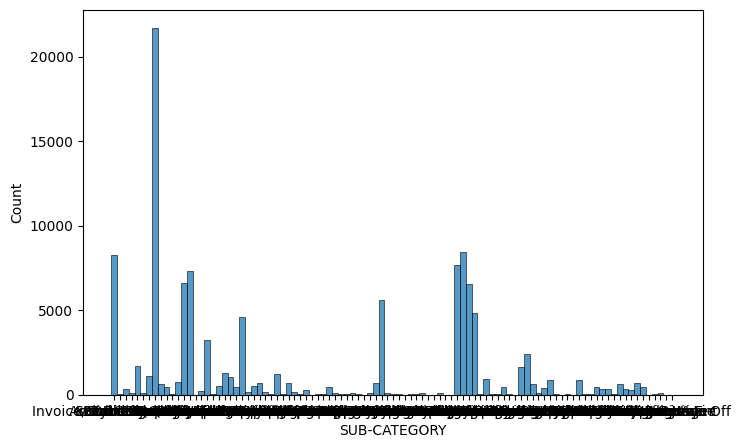

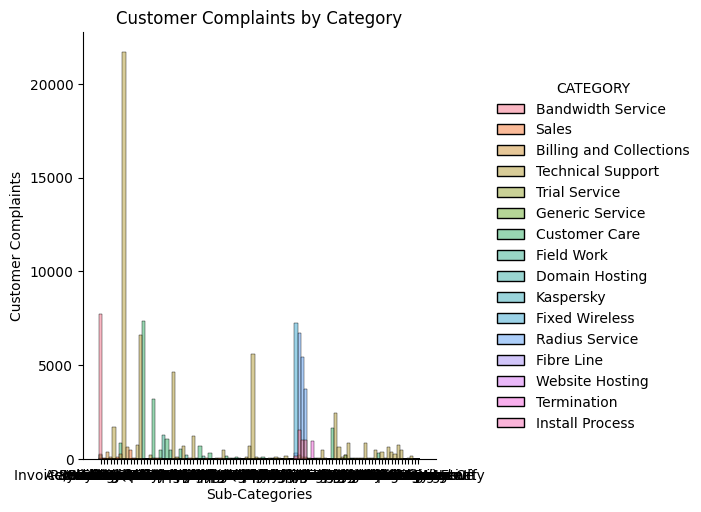

In [284]:
plt.figure(figsize=(8, 5))
sns.histplot(data=new_dataset, x='SUB-CATEGORY')
sns.displot(new_dataset, x="SUB-CATEGORY", hue="CATEGORY")
plt.title('Customer Complaints by Category')
plt.xlabel('Sub-Categories')
plt.ylabel('Customer Complaints')

Investigating the relationship between ticket prioroty and resolution time

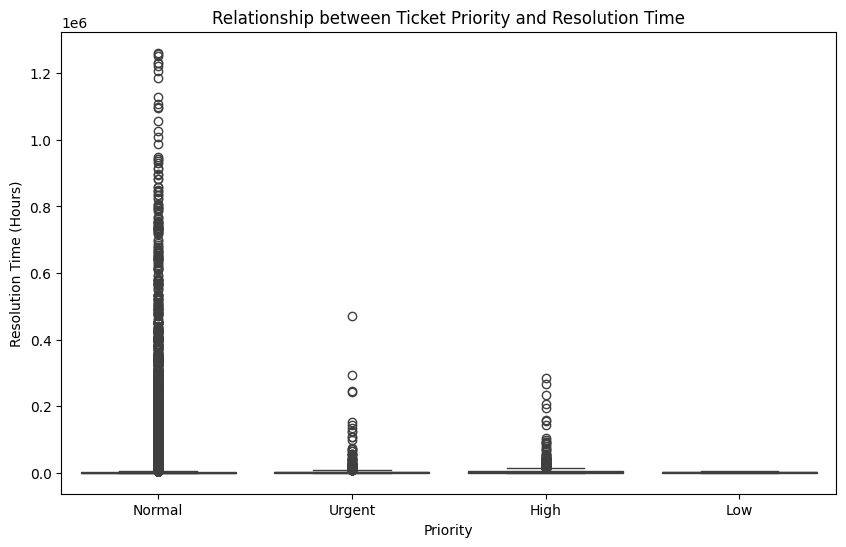

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_dataset, x='PRIORITY', y='TIME TO CLOSE (MINS)')
plt.title('Relationship between Ticket Priority and Resolution Time')
plt.xlabel('Priority')
plt.ylabel('Resolution Time (Hours)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=new_dataset, x='SERVICE PLAN', y='TIME TO CLOSE (MINS)', errorbar=None)
sns.displot(new_dataset, x="TIME TO CLOSE (MINS)", hue="SERVICE PLAN")
plt.title('Average Resolution Time for Each Service Plan')
plt.xlabel('Service Plan')
plt.ylabel('Average Resolution Time (Hours)')
plt.xticks(rotation=45, ha='right')
plt.show()